本研究主要比較不同的分類方法，並根據不同演算法在不同資料集中，找出最適合之參數。

- 有／無標準化之完整資料及主成分資料在分類的準確率
- 介紹多元羅吉斯回歸、支援向量機、神經網路的參數選擇
- 多元羅吉斯回歸、支援向量機、神經網路的比較
---

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

### Red Wine Data
有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。

資料探索分析，讀取資料，並印出資料前五筆觀察值。

In [140]:
df = pd.read_excel('pca_data/wine.xlsx')
print(df.shape)
df.head(5)

(178, 14)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


### 原始資料（沒有標準化），將資料分 訓練集 和 測試集

In [141]:
X = np.array(df.iloc[:, :-1]) # 排除最後一欄標籤 
y = np.array(df.iloc[:, -1]) # 標 籤 欄
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

### 原始資料（有標準化）

In [142]:
# Standardize data
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train) 
X_test_stand = scaler.fit_transform(X_test)

### 主成分資料 (有標準化)

### 由下方圖形可見取 10 個主成分就可以有 95% 原始資料的解釋能力，因此選擇 10 個主成分。

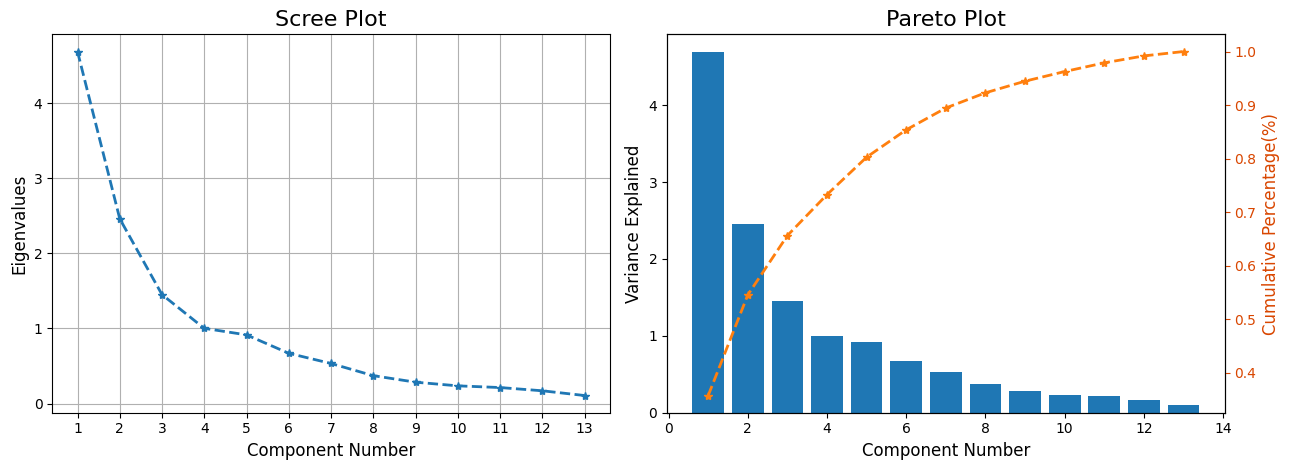

In [143]:
pca = PCA().fit(X_train_stand)
fig, axes = plt.subplots(ncols=2, figsize=(13,4.8))
x = np.arange(1,1+len(pca.explained_variance_))

axes[0].plot(x, pca.explained_variance_, marker = '*', lw = 2, linestyle='dashed')
axes[0].set_xticks(x)
axes[0].set_xlabel('Component Number', fontsize=12)
axes[0].set_ylabel('Eigenvalues', fontsize=12)
axes[0].grid(True)
axes[0].set_title('Scree Plot', fontsize=16)

axes[1].bar(x, pca.explained_variance_)
ax2 = axes[1].twinx()
ax2.plot(x, pca.explained_variance_ratio_.cumsum(), color='C1', marker = '*', lw = 2, linestyle='dashed')
ax2.tick_params(axis='y', colors='#D94600')
ax2.set_ylabel('Cumulative Percentage(%)', fontsize=12, color="#D94600")
axes[1].set_xlabel('Component Number', fontsize=12)
axes[1].set_ylabel('Variance Explained', fontsize=12)
axes[1].set_title('Pareto Plot', fontsize=16)

plt.tight_layout()
plt.show()

In [144]:
ratio = 0.95
n_comp = sum(pca.explained_variance_ratio_.cumsum() < ratio) + 1

In [145]:
pca = PCA(n_components = n_comp).fit(X_train_stand)
Z_train = pca.transform(X_train_stand)
Z_test = pca.transform(X_test_stand)

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

### 原始資料無標準化

In [147]:
opts = dict(tol = 0.000001, max_iter = int(1e6))

df_result = pd.DataFrame()

logistic_org = LogisticRegression(solver = 'newton-cg', **opts)
logistic_org.fit(X_train, y_train)
y_pred = logistic_org.predict(X_test)

tmpdf = pd.DataFrame(data = {'Method':['Logistic'], 
                             'accuracy':[accuracy_score(y_test, y_pred)], 
                             'f1score':[f1_score(y_test, y_pred, average='weighted')], 
                             'data':['原始資料（無標準化）'],
                             'solver':['lbfgs']})
df_result = pd.concat([df_result, tmpdf], ignore_index=True)
df_result

,Method,accuracy,f1score,data,solver
0,Logistic,0.972222,0.972634,原始資料（無標準化）,lbfgs


### 原始資料有標準化

In [148]:
opts = dict(tol = 0.000001, max_iter = int(1e6))

logistic_org = LogisticRegression(solver = 'newton-cg', **opts)
logistic_org.fit(X_train_stand, y_train)
y_pred = logistic_org.predict(X_test_stand)

tmpdf = pd.DataFrame(data = {'Method':['Logistic'], 
                             'accuracy':[accuracy_score(y_test, y_pred)], 
                             'f1score':[f1_score(y_test, y_pred, average='weighted')], 
                             'data':['原始資料（有標準化）'],
                             'solver':['lbfgs']})
df_result = pd.concat([df_result, tmpdf], ignore_index=True)

 ###  13 種葡萄酒成分的 10 個主成分為輸入資料

In [149]:
opts = dict(tol = 0.000001, max_iter = int(1e6))

logistic_org = LogisticRegression(solver = 'newton-cg', **opts)
logistic_org.fit(Z_train, y_train)
y_pred = logistic_org.predict(Z_test)

tmpdf = pd.DataFrame(data = {'Method':['Logistic'], 
                             'accuracy':[accuracy_score(y_test, y_pred)], 
                             'f1score':[f1_score(y_test, y_pred, average='weighted')], 
                             'data':['10 個主成分資料'],
                             'solver':['lbfgs']})
df_result = pd.concat([df_result, tmpdf], ignore_index=True)

由下方表格可知，可觀察出主成分資料在`accuracy`和`f1score`和原始資料相同，後續分類器的參數設定會由主成分的資料來分析
。

In [150]:
df_result

,Method,accuracy,f1score,data,solver
0,Logistic,0.972222,0.972634,原始資料（無標準化）,lbfgs
1,Logistic,1.000000,1.000000,原始資料（有標準化）,lbfgs
2,Logistic,0.972222,0.972634,10 個主成分資料,lbfgs



## 多元羅吉斯迴歸（Multinomial Logistic Regression）

多元羅吉斯迴歸（Multinomial Logistic Regression, MLR）是一種用於處理多分類問題的**監督式學習**演算法。它擴展了二元羅吉斯迴歸，使其能夠處理**有多個類別標籤**的情況。

---

#### 1. 基本概念
#### (1) 多分類問題
多元羅吉斯迴歸適用於依賴於多個特徵的**分類問題**，其中目標變數 $Y$ 有多個類別，並且我們希望預測 $Y$ 所屬的類別。類別可以是**順序的**（有序類別）或**無序的**（無序類別）。

例如，假設 $Y$ 有三個類別（例如 "低"、"中" 和 "高"），並且我們的目標是根據某些特徵來預測 $Y$ 的類別。

#### (2) 模型假設
假設我們有一組訓練數據 $\{(x_i, y_i)\}_{i=1}^{n}$，其中 $x_i$ 是特徵向量，$y_i$ 是類別標籤，$y_i \in \{1, 2, ..., K\}$，$K$ 是類別的數量。模型將每個類別的機率與特徵 $x_i$ 間的關係建模。

---

#### 2. 數學模型
多元羅吉斯迴歸模型可以使用**軟最大（Softmax）函數**來進行描述。對於 $K$ 類別，對應的機率可以寫為：
$$
P(y = k | x) = \frac{\exp(\beta_k^T x)}{\sum_{k'=1}^{K} \exp(\beta_{k'}^T x)}
$$
其中：
- $\beta_k$ 是第 $k$ 類別的回歸係數向量。
- $x$ 是特徵向量。

模型假設每個類別的對數機率（log-odds）是特徵的線性組合。對於每一個類別 $k$，其對數機率（logit）是：
$$
\log \left( \frac{P(y=k|x)}{P(y=K|x)} \right) = \beta_k^T x
$$
這裡我們選擇其中一個類別作為參考類別，通常選擇最後一個類別（$K$ 類別）作為基準。

---

### 3. 模型估計
#### (1) 最大似然估計（Maximum Likelihood Estimation, MLE）
多元羅吉斯迴歸的參數估計通常是通過**最大化似然函數**來進行的。對於給定的數據集，似然函數為：
$$
L(\beta_1, \beta_2, ..., \beta_K) = \prod_{i=1}^{n} P(y_i | x_i)
$$
對數似然函數為：
$$
\log L = \sum_{i=1}^{n} \log P(y_i | x_i) = \sum_{i=1}^{n} \log \left( \frac{\exp(\beta_{y_i}^T x_i)}{\sum_{k=1}^{K} \exp(\beta_k^T x_i)} \right)
$$
最終通過**牛頓法**或**梯度下降法**等方法進行求解。

#### (2) 正則化
為了防止過擬合，可以使用**L2正則化**（又稱**脊迴歸**）：
$$
\min_{\beta_1, \beta_2, ..., \beta_K} -\log L(\beta_1, \beta_2, ..., \beta_K) + \lambda \sum_{k=1}^{K} \|\beta_k\|^2
$$
其中 $\lambda$ 是正則化參數，控制模型複雜度。

---

### 4. 模型評估
#### (1) 混淆矩陣（Confusion Matrix）
多元羅吉斯迴歸的預測可以通過**混淆矩陣**來評估，這有助於了解模型對每個類別的預測準確性。

#### (2) 精確度、召回率與F1分數
- **精確度（Accuracy）**: $$\frac{\text{正確預測的樣本數}}{\text{總樣本數}}$$
- **召回率（Recall）**: $$\frac{\text{真正例}}{\text{真正例 + 假負例}}$$
- **精確率（Precision）**: $$\frac{\text{真正例}}{\text{真正例 + 假正例}}$$
- **F1分數（F1 Score）**: $$F1 = 2 \cdot \frac{\text{精確率} \cdot \text{召回率}}{\text{精確率} + \text{召回率}}$$

#### (3) 交叉驗證（Cross-Validation）
可以通過交叉驗證來進行模型選擇和參數調整，這有助於提高模型的穩定性和泛化能力。

---

### 分類器參數設定

本節在比較各分類器最佳的參數設定，會將訓練資料（整體資料的 80\%）進行交叉驗證，利用準確率及 f1score 找出最好的參數。

<font size=4> **CrossValidation** </font>

k 折交叉驗證（k-fold cross-validation），將訓練資料切割成 k 份資料，保留 1 份作為驗證模型的資料，將其餘 k-1 份用來訓練模型，進行 k 次交叉驗證，讓每份資料都有機會驗證一次，其運作方式如下圖所示。 <br>


<div>
<img src="https://i.imgur.com/SoH3X9z.png" width="500"/>
</div>


<font size=4> **評判標準** </font>

評判標準請參考第三節比較資料之間的表現相同。

【使用程式】

- `StratifiedShuffleSplit` : 切割資料，設定 random_state 固定切割的方式才能比較！

- `GridSearchCV` : 執行所有參數，並找出最佳參數

**<font size=4>參數調整</font>**

多元羅吉斯迴歸在 sklearn 套件中的指令為 `sklearn.linear_model`，指令為 `LogisticRegression`。有不同的演算法（`solver`）可以調整，可以選擇 lbfgs、liblinear、newton-cg、sag、saga，預設為 lbfgs。

- liblinear 適合小的資料集，而 sag 和 saga 適合大型資料，因為運算時間更快

- 針對多類別的反應變數，只有 newton-cg、sag、saga、lbfgs，可以計算 multinomial loss

- liblinear 是 one-versus-rest 的方法

各演算法可以使用的懲罰項：
- lbfgs : l2, None
- liblinear : l1, l2
- newton-cg : l2, None
- sag : l2, None
- saga : elasticnet, l1, l2, None

In [151]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

In [152]:
opts = dict(tol = 0.000001, max_iter = int(1e6))
parameters = {'solver':['lbfgs', 'liblinear', 'newton-cg','sag','saga']}

cv = StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state = 342)
grid = GridSearchCV(LogisticRegression(tol=0.000001, max_iter=int(1e6)), param_grid=parameters, cv=cv, 
                    scoring=['accuracy','f1_macro'], refit="accuracy")
grid.fit(X_train_stand, y_train)
df_result_logistic = pd.DataFrame(data = grid.cv_results_)

<font size=4 color=green>【參數選擇結果】</font>

從下方表格可知，使用 liblinear 演算法，有高達 98.2\% 的正確率及 0.92 的 f1score，後續將使用 liblinear 演算法作為學習器評比的參數。

In [153]:
df_result_logistic.loc[:,['param_solver', 'mean_test_accuracy', 'mean_test_f1_macro','mean_fit_time','mean_fit_time']]

,param_solver,mean_test_accuracy,mean_test_f1_macro,mean_fit_time,mean_fit_time
0,lbfgs,0.965517,0.966412,0.002912,0.002912
1,liblinear,0.965517,0.966412,0.000661,0.000661
2,newton-cg,0.965517,0.966412,0.002149,0.002149
3,sag,0.965517,0.966412,0.003004,0.003004
4,saga,0.965517,0.966412,0.005623,0.005623


## 支援向量機（Support Vector Machine，SVM）

支援向量機（SVM）是一種監督式學習（Supervised Learning）演算法，主要用於分類（Classification）與迴歸（Regression）問題。其核心思想是找到一個最優超平面（Optimal Hyperplane），以最大化類別之間的間隔（Margin），從而提高模型的泛化能力。

<div>
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*FwrX8viaCLljRAAxiSAp8Q.png" width="600"/>
</div>

關於 hyperplane 可以參考 [SVM 支援向量機演算法-原理篇](https://iter01.com/582104.html)。

**<font size=4>SVM 的核心概念</font>**
#### (1) 超平面（Hyperplane）
在 **\(d\) 維空間** 中，超平面是一個 **\(d-1\) 維** 的決策邊界。例如：
- 在 **2D 空間**，超平面是一條直線。
- 在 **3D 空間**，超平面是一個平面。

SVM 透過尋找能夠**最佳分隔不同類別**的超平面來進行分類。

#### (2) 間隔（Margin）
間隔指的是**離超平面最近的點到超平面的距離**。SVM 目標是**最大化間隔（Maximal Margin）**，從而提升模型的泛化能力。

#### (3) 支援向量（Support Vectors）
支援向量是**最接近超平面的資料點**，它們決定了最佳超平面的位置與方向。只有這些點影響分類結果，其他資料點則不影響。

---

**<font size=4>SVM 的數學公式</font>**
假設我們有一個二元分類問題：
- 訓練數據 $\{(x_i, y_i)\}_{i=1}^{n}$，其中 $x_i$ 是特徵向量，$y_i \in \{-1, 1\}$ 是類別標籤。
- 我們希望找到一個線性超平面：
$$
  w^T x + b = 0
$$
  其中 \(w\) 是法向量，\(b\) 是偏移量。

最佳超平面應滿足：
$$
y_i (w^T x_i + b) \geq 1, \quad \forall i
$$

並透過**最大化間隔 $ \frac{2}{\|w\|} $** 來找到最優解：
$$
\min_{w, b} \frac{1}{2} \|w\|^2
$$
$$
\text{subject to } y_i (w^T x_i + b) \geq 1, \forall i
$$

這是一個 **凸二次規劃問題（Quadratic Programming, QP）**，可以透過拉格朗日對偶方法求解。

---
**<font size=4>SVM 的變體</font>**
#### (1) 線性 SVM（Linear SVM）
當數據**線性可分**時，SVM 可以直接找到一條超平面來進行分類。

#### (2) 非線性 SVM
當數據**非線性可分**時，可以透過**核方法（Kernel Trick）**將數據映射到高維特徵空間，使其變得線性可分。常見的核函數包括：
- **多項式核（Polynomial Kernel）**: $K(x_i, x_j) = (x_i^T x_j + c)^d$
- **高斯徑向基核（RBF Kernel）**: $K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2)$
- **Sigmoid 核**: $K(x_i, x_j) = \tanh(\alpha x_i^T x_j + c)$

#### (3) 軟間隔 SVM（Soft Margin SVM）
在某些情況下，數據可能**無法完美分離**。此時，我們允許部分資料點違反間隔約束，並透過引入**懲罰參數 \(C\)** 來控制錯誤分類的程度：
$$
\min_{w, b, \xi} \frac{1}{2} \|w\|^2 + C \sum \xi_i
$$
$$
\text{subject to } y_i (w^T x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0
$$
其中 $\xi_i$ 是鬆弛變數，允許某些點位於間隔內甚至被錯誤分類。

**<font size=4>參數調整</font>**

SVM 在 sklearn 套件中的指令為 `sklearn.svm`，在此我們使用到之中的 `SVC`，也就是應用在分類問題的 SVM。下方列出 `SVC` 中重要的調整參數及它們的意義。

- `C` : 懲罰係數，就是對誤差的容忍度，預設為 1。<br>
    C 越高，越不能接受誤差，容易過度配適（Overfitting），反之，C越小，接受的誤差太大，就會發生配適不足（Underfitting）的情況。


- `kernel` : 核函式，linear、poly、rbf、sigmoid，預測為 rbf。<br>
    kernel 就是上述文章提到的**核函式**，可以將樣本從低維空間對映到高維空間，讓 SVM 可以處理非線性問題，是 SVM 中的核心角色。其中每個核函式皆會有不同的參數需要調整，SVM 的參數選擇看起來很多，但其實是因為每個核函式要調整參數不同，接著介紹核函式及需要調整的參數。

    - linear : 線性函式
       
    - sigmoid : S 型內核，主要調整參數有 gamma、C。
    
    - poly : 多項函式，主要調整參數有 degree、gamma、C。

    - rbf : rbf (Radial Based Function) 徑向核函數可以表示無限多維空間，主要調整參數有 degree、gamma、C。
        
        
- `degree` : 調整多項式的最高次方，預設為 3，只有在 `kernel='ploy'` 時會用到。


- `gamma` : 單筆資料的影響範圍，scale、auto、非負小數，預設為 scale，只有在核函數是非線性函式會用到，像是：poly、rbf、sigmoid。<br>
    **低代表遠，高則代表近**，因此 gamma 越小，計算 hyperplane 考量到的支援向量就越多，反之。
    
    - scale : $\frac{1}{nfeatures \times X.var()}$
    
    - auto : $\frac{1}{nfeatures}$


- `decision_function_shape` : 決策函數，ovr 或 ovo，預設為 ovr。
    
    - ovr : one-vs-rest，每個群組在建立 hyperplane 時是以其他全部群組作為對立面，可以不用運算那麼多次，但就會是不平衡資料。
    
    - ovo : one-vs-one，每個群組在建立 hyperplane 時是以其他個別群組作為對立面，要運算較多次。

In [154]:
def boxplotset(xcol, ycol, df_result):
    draw_dict = {}
    for i in np.sort(list(set(df_result[xcol]))):
        draw_dict[i] = df_result.loc[df_result[xcol]==i, ycol]
    plt.boxplot([i for i in draw_dict.values()], labels=[str(i) for i in draw_dict.keys()])
    plt.ylabel(ycol)
    plt.xlabel(xcol)
    plt.show()

In [155]:
from sklearn.svm import SVC

In [156]:
C_range = [1, 5, 10, 50, 100]
gamma_range = np.logspace(-5, 1, 10)
parameters = {'decision_function_shape':('ovr','ovo'), 'C':C_range, 'gamma':gamma_range}

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=123)
grid = GridSearchCV(SVC(tol=0.000001, max_iter=int(1e6)), param_grid=parameters, cv=cv, 
                    scoring=['accuracy','f1_macro'], refit="accuracy")
grid.fit(X_train_stand, y_train)
df_result_SVM = pd.DataFrame(data = grid.cv_results_)
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1, 'decision_function_shape': 'ovr', 'gamma': np.float64(0.1)} with a score of 0.99


In [157]:
C_range = [0.01, 0.1, 1, 10, 100]
gamma_range = [1, 10]

parameters = [{'kernel': ['linear'], 'C':C_range}, 
              {'kernel': ['rbf', 'sigmoid'], 'gamma':gamma_range, 'C':C_range},
              {'kernel': ['poly'], 'gamma':gamma_range, 'C':C_range, 'degree':[2,3,4,5,6]}]

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=123)
grid = GridSearchCV(SVC(tol=0.000001, max_iter=int(1e6)), param_grid=parameters, cv=cv, 
                    scoring=['accuracy','f1_macro'], refit="accuracy")
grid.fit(X_train_stand, y_train)

df_result_SVM = pd.DataFrame(data = grid.cv_results_)
print("The best parameters are %s with an accuracy of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.1, 'kernel': 'linear'} with an accuracy of 0.98


<font size=4 color=green>【參數選擇結果】</font>

最佳參數為使用線性核函數以及 0.01 的懲罰係數，有 97\% 的正確率及 0.97 的 f1score。

In [158]:
df_result_SVM.loc[df_result_SVM['mean_test_f1_macro']==df_result_SVM['mean_test_f1_macro'].max(),['params', 'mean_test_f1_macro']]

,params,mean_test_f1_macro
1,"{'C': 0.1, 'kernel': 'linear'}",0.979952


## 神經網路（Neural Network, NN）

神經網路（Neural Network, NN）是一種模仿**人腦神經元結構**的計算模型，用於處理複雜的非線性問題。神經網路在機器學習中具有廣泛的應用，尤其在**圖像識別**、**語音處理**、**自然語言處理**等領域表現出色。

---

### 1. 神經網路的基本結構
神經網路由多層**神經元（Neuron）**組成，每個神經元接收來自上一層的輸入，並經過加權和激活函數進行處理，最終將結果傳遞給下一層。

#### (1) 神經元（Neuron）
每個神經元都有**輸入**（Input）、**權重**（Weight）、**偏差**（Bias）、**激活函數**（Activation Function）和**輸出**（Output）。神經元的計算過程如下：
$$
z = \sum_{i=1}^{n} w_i x_i + b
$$
$$
a = \sigma(z)
$$
其中：
- $x_i$ 是第 $i$ 個輸入
- $w_i$ 是對應的權重
- $b$ 是偏差
- $\sigma(z)$ 是激活函數（例如：ReLU、Sigmoid、Tanh等）

#### (2) 網路結構
神經網路通常由三個主要部分組成：
- **輸入層（Input Layer）**：接收外部數據並將其傳遞給下一層。
- **隱藏層（Hidden Layers）**：神經網路中間的層，包含若干神經元，負責進行數據的處理與特徵提取。
- **輸出層（Output Layer）**：將網路的計算結果輸出，通常對應分類結果或回歸預測。

![image-2.png](https://miro.medium.com/v2/resize:fit:720/format:webp/1*6AxEGdJGViO8oF-YPXkQag.png)
---

### 2. 訓練神經網路
#### (1) 前向傳播（Forward Propagation）
前向傳播是將數據從輸入層通過隱藏層傳遞到輸出層的過程。在每一層，神經元的輸出是其輸入的加權和，並通過激活函數進行非線性變換。

#### (2) 損失函數（Loss Function）
神經網路訓練的目標是最小化**損失函數**，該函數衡量模型預測值與真實值之間的誤差。常見的損失函數包括：
- **均方誤差（Mean Squared Error, MSE）**：用於回歸問題。
$$
L = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$
- **交叉熵損失（Cross-Entropy Loss）**：用於分類問題。
$$
L = - \sum_{i=1}^{N} y_i \log(\hat{y}_i)
$$
其中 $y_i$ 是真實標籤，$\hat{y}_i$ 是模型預測。

### (3) 反向傳播（Backpropagation）
反向傳播是神經網路訓練過程中的關鍵步驟，它通過計算損失函數相對於各層權重和偏差的梯度，並利用這些梯度來更新網路中的參數。反向傳播使用**鏈式法則**來計算每層的梯度，並將誤差從輸出層傳遞回輸入層。

更新規則通常使用**梯度下降法**或其變種（如隨機梯度下降法SGD、Adam等）來調整參數：
$$
w = w - \eta \cdot \frac{\partial L}{\partial w}
$$
其中 $\eta$ 是學習率，控制參數更新的步伐。

---

### 3. 激活函數
激活函數用於引入非線性，使得神經網路能夠學習和表示複雜的函數。常見的激活函數包括：
- **Sigmoid**：
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$
適用於二分類問題，輸出範圍為 \(0\) 到 \(1\)。

- **ReLU（Rectified Linear Unit）**：
$$
\sigma(z) = \max(0, z)
$$
ReLU 是目前使用最廣泛的激活函數，適用於大多數問題，能夠有效避免梯度消失問題。

- **Tanh（雙曲正切）**：
$$
\sigma(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
$$
輸出範圍為 \([-1, 1]\)，在某些情況下優於Sigmoid。

- **Softmax**：
Softmax 函數通常用於多分類問題的輸出層，其將多個輸出值轉換為概率分佈，保證所有輸出的總和為 1：
$$
P(y = k | x) = \frac{\exp(z_k)}{\sum_{k'} \exp(z_{k'})}
$$
其中 \(z_k\) 是第 \(k\) 類別的輸出。

---

### 4. 神經網路的優化方法
#### (1) 學習率（Learning Rate）
學習率決定了每次參數更新的步伐大小。過大的學習率可能導致不穩定的訓練，而過小的學習率則可能使訓練過程過於緩慢。

#### (2) 正則化（Regularization）
正則化技術用於防止過擬合，常見的方法包括：
- **L2正則化（Ridge）**：在損失函數中添加權重的平方懲罰項。
- **Dropout**：隨機丟棄神經元，減少模型的過擬合。

#### (3) 批量正則化（Batch Normalization）
批量正則化是通過在每一層對輸入進行標準化（即均值為0，方差為1）來加速訓練並提高模型的穩定性。

---

**<font size=4>參數調整</font>**

神經網路在 sklearn 套件中的指令為 `sklearn.neural_network`，我們使用到指令 `MLPClassifier`，也就是應用在分類問題的神經網路。下方列出重要的調整參數及意義。

- `activation` : 激活函數，可選擇 identity, logistic, tanh, relu，預設為 relu。<br>
    激活函數最主要的目的就是在神經網路中加入非線性的部分，詳細函數的型態請參考下圖。
    
    <div>
<img src="https://1394217531-files.gitbook.io/~/files/v0/b/gitbook-legacy-files/o/assets%2F-LvBP1svpACTB1R1x_U4%2F-LvNWUoWieQqaGmU_gl9%2F-LvO3qs2RImYjpBE8vln%2Factivation-functions3.jpg?alt=media&token=f96a3007-5888-43c3-a256-2dafadd5df7c" width="500"/>
</div>

- `solver` : 權重優化的演算法，可選擇 lbfgs, sgd, adam，預設為 adam。<br>
    - lbfgs :  family of quasi-Newton methods
    - sgd : refers to stochastic gradient descent
    - adam : refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba

- `hidden_layer_sizes` : (神經元的個數, 隱藏層層數)，設定模型的複雜度，看要有幾個和幾層神經元。<br>
    要特別注意的是 Sklearn 的隱藏層不包含輸出層，預設為(100,)，也就是只有一層100 個神經元的隱藏層。


In [159]:
from sklearn.neural_network import MLPClassifier

In [163]:
activ_range = ['identity', 'logistic', 'tanh', 'relu']
solver = ['lbfgs', 'sgd', 'adam']

parameters = {'activation': activ_range, 'solver':solver, 
               'hidden_layer_sizes':[(i,) for i in np.arange(5, 41, 5)]}

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=342)
grid = GridSearchCV(MLPClassifier(tol=0.000001, max_iter=int(1e6)), param_grid=parameters, cv=cv, 
                    scoring=['accuracy','f1_macro'], refit="accuracy")
grid.fit(X_train_stand, y_train)

df_result_NN = pd.DataFrame(data = grid.cv_results_)
df_result_NN['nodes'] = [i[0] for i in df_result_NN['param_hidden_layer_sizes']]
print("The best parameters are %s with an accuracy of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'activation': 'logistic', 'hidden_layer_sizes': (np.int64(10),), 'solver': 'adam'} with an accuracy of 0.97


Iteration 1, loss = 1.30655644
Iteration 2, loss = 1.28635308
Iteration 3, loss = 1.26792315
Iteration 4, loss = 1.25431998
Iteration 5, loss = 1.24328143
Iteration 6, loss = 1.23303881
Iteration 7, loss = 1.22310964
Iteration 8, loss = 1.21330574
Iteration 9, loss = 1.20348613
Iteration 10, loss = 1.19352225
Iteration 11, loss = 1.18330961
Iteration 12, loss = 1.17282067
Iteration 13, loss = 1.16205915
Iteration 14, loss = 1.15100744
Iteration 15, loss = 1.13977946
Iteration 16, loss = 1.12858166
Iteration 17, loss = 1.11742002
Iteration 18, loss = 1.10629010
Iteration 19, loss = 1.09566481
Iteration 20, loss = 1.08660022
Iteration 21, loss = 1.08000601
Iteration 22, loss = 1.07589298
Iteration 23, loss = 1.07344882
Iteration 24, loss = 1.07164714
Iteration 25, loss = 1.06994621
Iteration 26, loss = 1.06827681
Iteration 27, loss = 1.06593179
Iteration 28, loss = 1.06210781
Iteration 29, loss = 1.05709061
Iteration 30, loss = 1.05165843
Iteration 31, loss = 1.04653130
Iteration 32, los

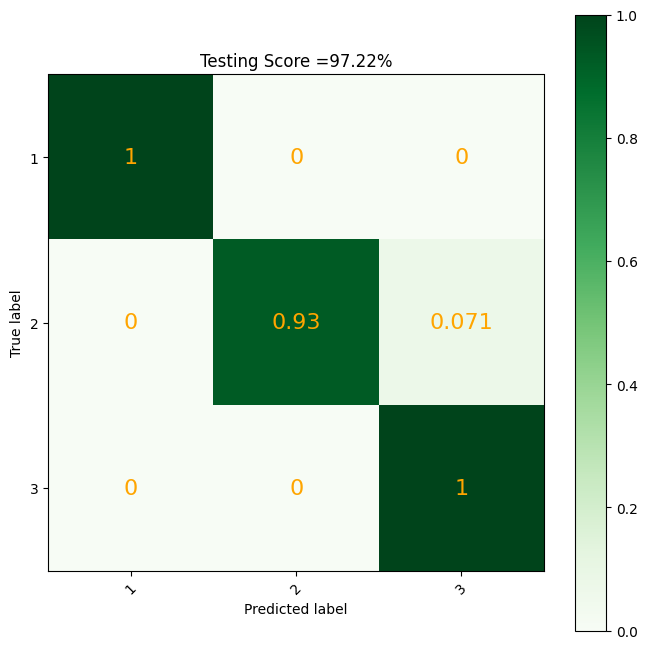

In [178]:

hidden_layers = (30,)
activation = 'logistic'
opts = dict(hidden_layer_sizes = hidden_layers, verbose = True, activation = activation, tol = 1e-6, max_iter = int(1e6))
# solver = ’sgd’ # not efficient, need more tuning # solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
clf_MLP = MLPClassifier(solver = solver, **opts)
clf_MLP.fit(X_train, y_train)
predictions = clf_MLP.predict(X_test) 
print(classification_report(y_test, predictions))

from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(1, 1, figsize=(8,8)) 
score = 100*clf_MLP.score(X_test, y_test) 
title = 'Testing Score ={:.2f}%'.format(score)
disp = ConfusionMatrixDisplay.from_estimator( clf_MLP ,X_test ,y_test ,xticks_rotation=45, #’vertical’, 
                                             cmap=plt.cm.Greens, 
                                             normalize='true', 
                                             ax = ax) 
disp.ax_.set_title(title) 

for text in disp.ax_.texts:  
    text.set_fontsize(16)  
    text.set_color("orange") 
plt.show()
# Plot loss curve
#plt.plot(clf_MLP.loss_curve_)
#plt.title('Loss Curve during Training')
#plt.xlabel('Iterations')
#plt.ylabel('Loss')
#plt.grid(True)
#plt.show()

<font size=4 color=green>【參數選擇結果】</font>

從上述可以看出，最佳參數為：使用 10 個神經元、logistic 激活函式、adam 演算法，有97\% 的正確率。


In [190]:
df_result_compare = pd.DataFrame()

In [191]:
df_final_compare = df_result_logistic.copy()
fltr = df_final_compare['mean_test_accuracy']==df_final_compare['mean_test_accuracy'].max()
opts = df_final_compare.loc[fltr, 'params'].values[0]

clf = LogisticRegression(tol=0.000001, max_iter=int(1e6), **opts)
clf.fit(X_train_stand, y_train)
y_pred = clf.predict(X_test_stand) 

d = {'分類演算法':['Logistic'], '使用參數':[str(opts)], '準確率':[np.round(accuracy_score(y_test, y_pred)*100,2)],
 'F-Score':[np.round(f1_score(y_test, y_pred, average='weighted')*100,2)]}
df_result_compare = pd.concat([df_result_compare, pd.DataFrame(data=d)], ignore_index=True)

In [192]:
df_final_compare = df_result_SVM.copy()
fltr = df_final_compare['mean_test_accuracy']==df_final_compare['mean_test_accuracy'].max()
opts = df_final_compare.loc[fltr, 'params'].values[0]


clf = SVC(tol=0.000001, max_iter=int(1e6), **opts)
clf.fit(X_train_stand, y_train)
y_pred = clf.predict(X_test_stand) 

d = {'分類演算法':['SVM'], '使用參數':[str(opts)], '準確率':[np.round(accuracy_score(y_test, y_pred)*100,2)],
 'F-Score':[np.round(f1_score(y_test, y_pred, average='weighted')*100,2)]}
df_result_compare = pd.concat([df_result_compare, pd.DataFrame(data=d)], ignore_index=True)

In [193]:
df_final_compare = df_result_NN.copy()
fltr = df_final_compare['mean_test_accuracy']==df_final_compare['mean_test_accuracy'].max()
opts = df_final_compare.loc[fltr, 'params'].values[0]

clf = MLPClassifier(tol=0.000001, max_iter=int(1e6), **opts)
clf.fit(X_train_stand, y_train)
y_pred = clf.predict(X_test_stand) 

d = {'分類演算法':['Neural Network'], '使用參數':[str(opts)], '準確率':[np.round(accuracy_score(y_test, y_pred)*100,2)],
 'F-Score':[np.round(f1_score(y_test, y_pred, average='weighted')*100,2)]}
df_result_compare = pd.concat([df_result_compare, pd.DataFrame(data=d)], ignore_index=True)

In [194]:
df_result_compare

,分類演算法,使用參數,準確率,F-Score
0,Logistic,{'solver': 'lbfgs'},100.00,100.00
1,SVM,"{'C': 0.1, 'kernel': 'linear'}",97.22,97.26
2,Neural Network,"{'activation': 'logistic', 'hidden_layer_sizes...",100.00,100.00


In [195]:
df_result_NN

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_solver,params,split0_test_accuracy,split1_test_accuracy,...,rank_test_accuracy,split0_test_f1_macro,split1_test_f1_macro,split2_test_f1_macro,split3_test_f1_macro,split4_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro,nodes
0,0.004379,0.001972,0.001185,0.000293,identity,"(5,)",lbfgs,"{'activation': 'identity', 'hidden_layer_sizes...",1.0,0.965517,...,45,1.0,0.965899,0.967963,0.926740,0.900966,0.952314,0.034624,57,5
1,0.610409,0.087502,0.000898,0.000015,identity,"(5,)",sgd,"{'activation': 'identity', 'hidden_layer_sizes...",1.0,0.965517,...,81,1.0,0.965899,0.899749,0.926740,0.932456,0.944969,0.034642,90,5
2,0.395441,0.045951,0.000811,0.000079,identity,"(5,)",adam,"{'activation': 'identity', 'hidden_layer_sizes...",1.0,0.965517,...,45,1.0,0.965899,0.932545,0.926740,0.932529,0.951543,0.027899,79,5
3,0.003009,0.000721,0.000738,0.000030,identity,"(10,)",lbfgs,"{'activation': 'identity', 'hidden_layer_sizes...",1.0,0.965517,...,45,1.0,0.965899,0.967963,0.926740,0.900966,0.952314,0.034624,57,10
4,0.573877,0.061246,0.000825,0.000069,identity,"(10,)",sgd,"{'activation': 'identity', 'hidden_layer_sizes...",1.0,0.965517,...,28,1.0,0.965899,0.932660,0.964444,0.932456,0.959092,0.025126,34,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.728129,0.065917,0.000914,0.000066,relu,"(35,)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",1.0,0.965517,...,86,1.0,0.965899,0.932660,0.933007,0.900966,0.946506,0.033721,81,35
92,0.236701,0.023557,0.000912,0.000163,relu,"(35,)",adam,"{'activation': 'relu', 'hidden_layer_sizes': (...",1.0,0.965517,...,15,1.0,0.965899,0.965899,0.932660,0.964444,0.965781,0.021306,16,35
93,0.003061,0.000201,0.000781,0.000030,relu,"(40,)",lbfgs,"{'activation': 'relu', 'hidden_layer_sizes': (...",1.0,0.965517,...,15,1.0,0.965899,0.932660,0.964444,0.964444,0.965490,0.021312,19,40
94,0.699647,0.047683,0.000868,0.000060,relu,"(40,)",sgd,"{'activation': 'relu', 'hidden_layer_sizes': (...",1.0,0.965517,...,93,1.0,0.965899,0.899749,0.932529,0.900741,0.939784,0.038698,93,40
